In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from uvb_abun_pairwise_compare import *
import yt
import trident

/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
with open("/mnt/scratch/tairaeli/halo2392_pcw_2019/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    pcw_dat = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/halo2392_hm_2012/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    hm_dat = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/halo2392_fg_2009/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    fg_dat = pickle.load(salsa_dat)

In [3]:
pcw_v_hm = pcw_dat
pcw_v_hm["C II"]["HM_2012"] = hm_dat["C II"]["HM_2012"]
pcw_v_hm["C IV"]["HM_2012"] = hm_dat["C IV"]["HM_2012"]
pcw_v_hm["O VI"]["HM_2012"] = hm_dat["O VI"]["HM_2012"]

In [4]:
ion_list = ["C II", "C IV", "O VI"]
nrays = 4

pcw_v_hm_comp = pairwise_compare(pcw_v_hm, ion_list, nrays)

mx 15
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 8
id2 8
id1 9
id2 9
id1 10
id2 10
id1 11
id2 11
id1 12
id2 12
id1 13
id2 13
id1 14
id2 13
mx 8
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 5
id2 6
id1 5
id2 7
mx 10
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 4
id2 5
id1 4
id2 6
id1 4
id2 7
id1 4
id2 8
id1 4
id2 9
mx 6
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
mx 13
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 5
id1 7
id2 6
id1 8
id2 7
id1 9
id2 8
id1 10
id2 9
id1 11
id2 10
id1 12
id2 11
mx 9
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 2
id2 3
id1 3
id2 4
id1 4
id2 5
id1 5
id2 6
id1 6
id2 7
id1 7
id2 8
mx 10
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 4
id1 4
id2 5
id1 4
id2 6
id1 5
id2 8
id1 6
id2 9
mx 9
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 8
id2 8
mx 23

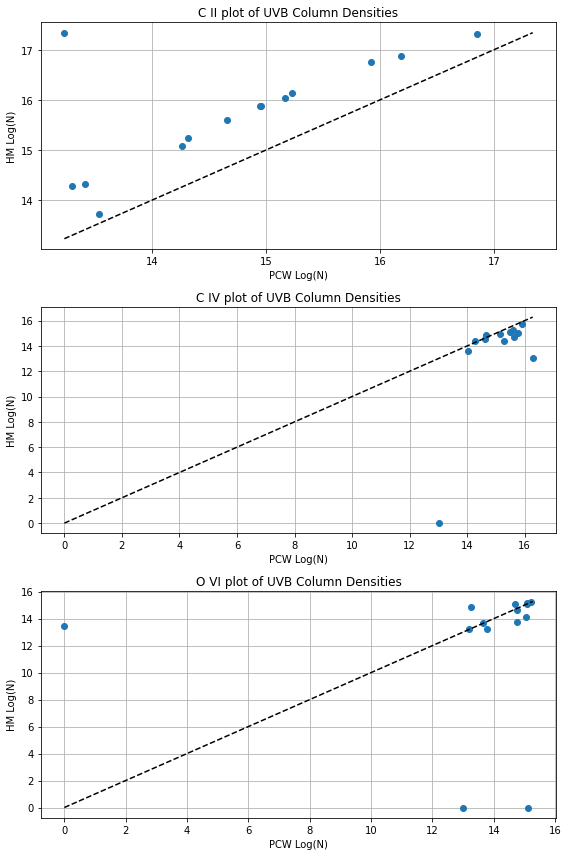

In [5]:
fig, ax = plt.subplots(3,1, figsize = [8,12])

ray = 0

for i, ion in enumerate(ion_list):
    pcw_dens = pcw_v_hm_comp[1][ion][ray]
    hm_dens = pcw_v_hm_comp[2][ion][ray]
    
    small_dens = np.min([pcw_dens, hm_dens])
    large_dens = np.max([pcw_dens, hm_dens])
    
    sim_line = np.linspace(small_dens, large_dens, 20)
    
    ax[i].plot(pcw_dens,hm_dens, "o")
    ax[i].plot(sim_line,sim_line, "--", color = "black")
    ax[i].set_xlabel("PCW Log(N)")
    ax[i].set_ylabel("HM Log(N)")
    ax[i].set_title(f"{ion} plot of UVB Column Densities")
    ax[i].grid()
    

plt.tight_layout()
plt.savefig("col_dens_compare.png",dpi= 500)

In [6]:
def compare_clump_dat(df_list,df_name_list,ion,ray):
    dens_list = []
    for i,df in enumerate(df_list):
        df_ion_ray = df[ion][df_name_list[i]][df[ion][df_name_list[i]]["lightray_index"] == str(ray)]

        df_clump_dens = np.zeros(df_ion_ray["interval_end"][len(df_ion_ray["col_dens"])-1])

        for iclump in range(len(df_ion_ray["col_dens"])-1):
            df_clump_dens[int(df_ion_ray["interval_start"][iclump]):int(df_ion_ray["interval_end"][iclump])]\
            = df_ion_ray["col_dens"][iclump]
        
        dens_list.append(df_clump_dens)
    
    return dens_list

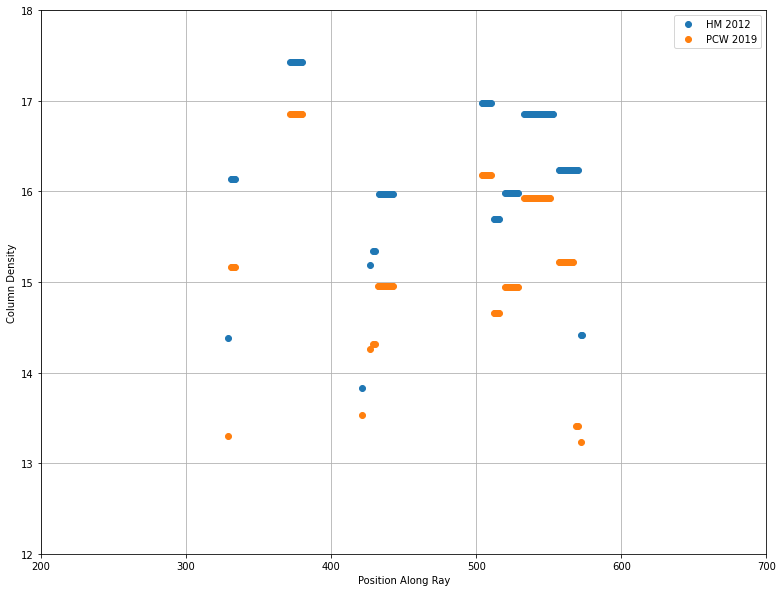

In [7]:
hm_dens,pcw_dens = compare_clump_dat([hm_dat,pcw_dat],["HM_2012","PCW_2019"],"C II",0)

plt.figure(figsize = [13,10])
plt.plot(hm_dens+0.1, label = "HM 2012", linestyle = "None", marker = "o")
plt.plot(pcw_dens, label = "PCW 2019", linestyle = "None", marker = "o")

plt.ylim(12,18)
plt.xlim(200,700)
plt.xlabel("Position Along Ray")
plt.ylabel("Column Density")
plt.grid()
plt.legend()

In [8]:
abundances = np.genfromtxt("/mnt/home/tairaeli/trident_uncertainty/mods/abundances/scripts/abun_table.txt",
                           skip_header = 1)

with open("/mnt/home/tairaeli/trident_uncertainty/mods/abundances/scripts/abun_table.txt") as f:
    elements = f.readline().strip().split(' ')

In [9]:
abundances[1]

array([1.00000000e+00, 1.00000000e+00, 3.83399494e-01, 6.95873227e-10,
       5.15680915e-19, 1.15891703e-11, 2.96136320e-03, 9.62879863e-04,
       1.11918281e-02, 4.52141212e-07, 3.09706056e-03, 6.61925514e-05,
       1.19179702e-03, 8.45721245e-05, 1.68814659e-03, 8.54744070e-06,
       8.21791084e-04, 3.25630734e-06, 1.51703357e-04, 1.81913048e-06,
       1.13209782e-04, 2.03213935e-08, 2.67889754e-06, 2.89875000e-07,
       3.04845963e-05, 1.58589948e-05, 2.35886709e-03, 4.02206724e-06,
       1.03480005e-04, 9.26123294e-07, 2.52674056e-06])

In [10]:
ray = 0
ion = "O VI"
atom,istate = ion.split(" ")

field_name = f"{atom}_p{trident.from_roman(istate)-1}_number_density"

abuns = dict(zip(elements, abundances[1]))

uvb = "/mnt/home/tairaeli/trident_uncertainty/mods/abundances/data_bin/hm2012_ss_hr.h5"
uvb_name = "HM_2012"

hm_ray = yt.load(f"/mnt/scratch/tairaeli/halo2392_hm_2012/redshift2.0/rays/ray{ray}.h5")
trident.add_ion_number_density_field(atom, trident.from_roman(istate), hm_ray, abundance_dict = abuns, 
                                     ionization_table = uvb)
dens = hm_ray.r[("gas",field_name)].copy()

yt : [INFO     ] 2023-03-25 22:42:32,772 Parameters: current_time              = 154.80100926529 code_time
yt : [INFO     ] 2023-03-25 22:42:32,775 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-03-25 22:42:32,777 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-03-25 22:42:32,779 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2023-03-25 22:42:32,781 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-03-25 22:42:32,783 Parameters: current_redshift          = 2
yt : [INFO     ] 2023-03-25 22:42:32,785 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-03-25 22:42:32,786 Parameters: omega_matter              = 0.285
yt : [ERROR    ] 2023-03-25 22:42:32,788 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-03-25 22:42:32,791 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2023-03-25 22:42:32,851 Allocating for 9.160e+02 particle

Buckle up bc we're about to get wRIGGITY WRIGGITY WRECKED SON


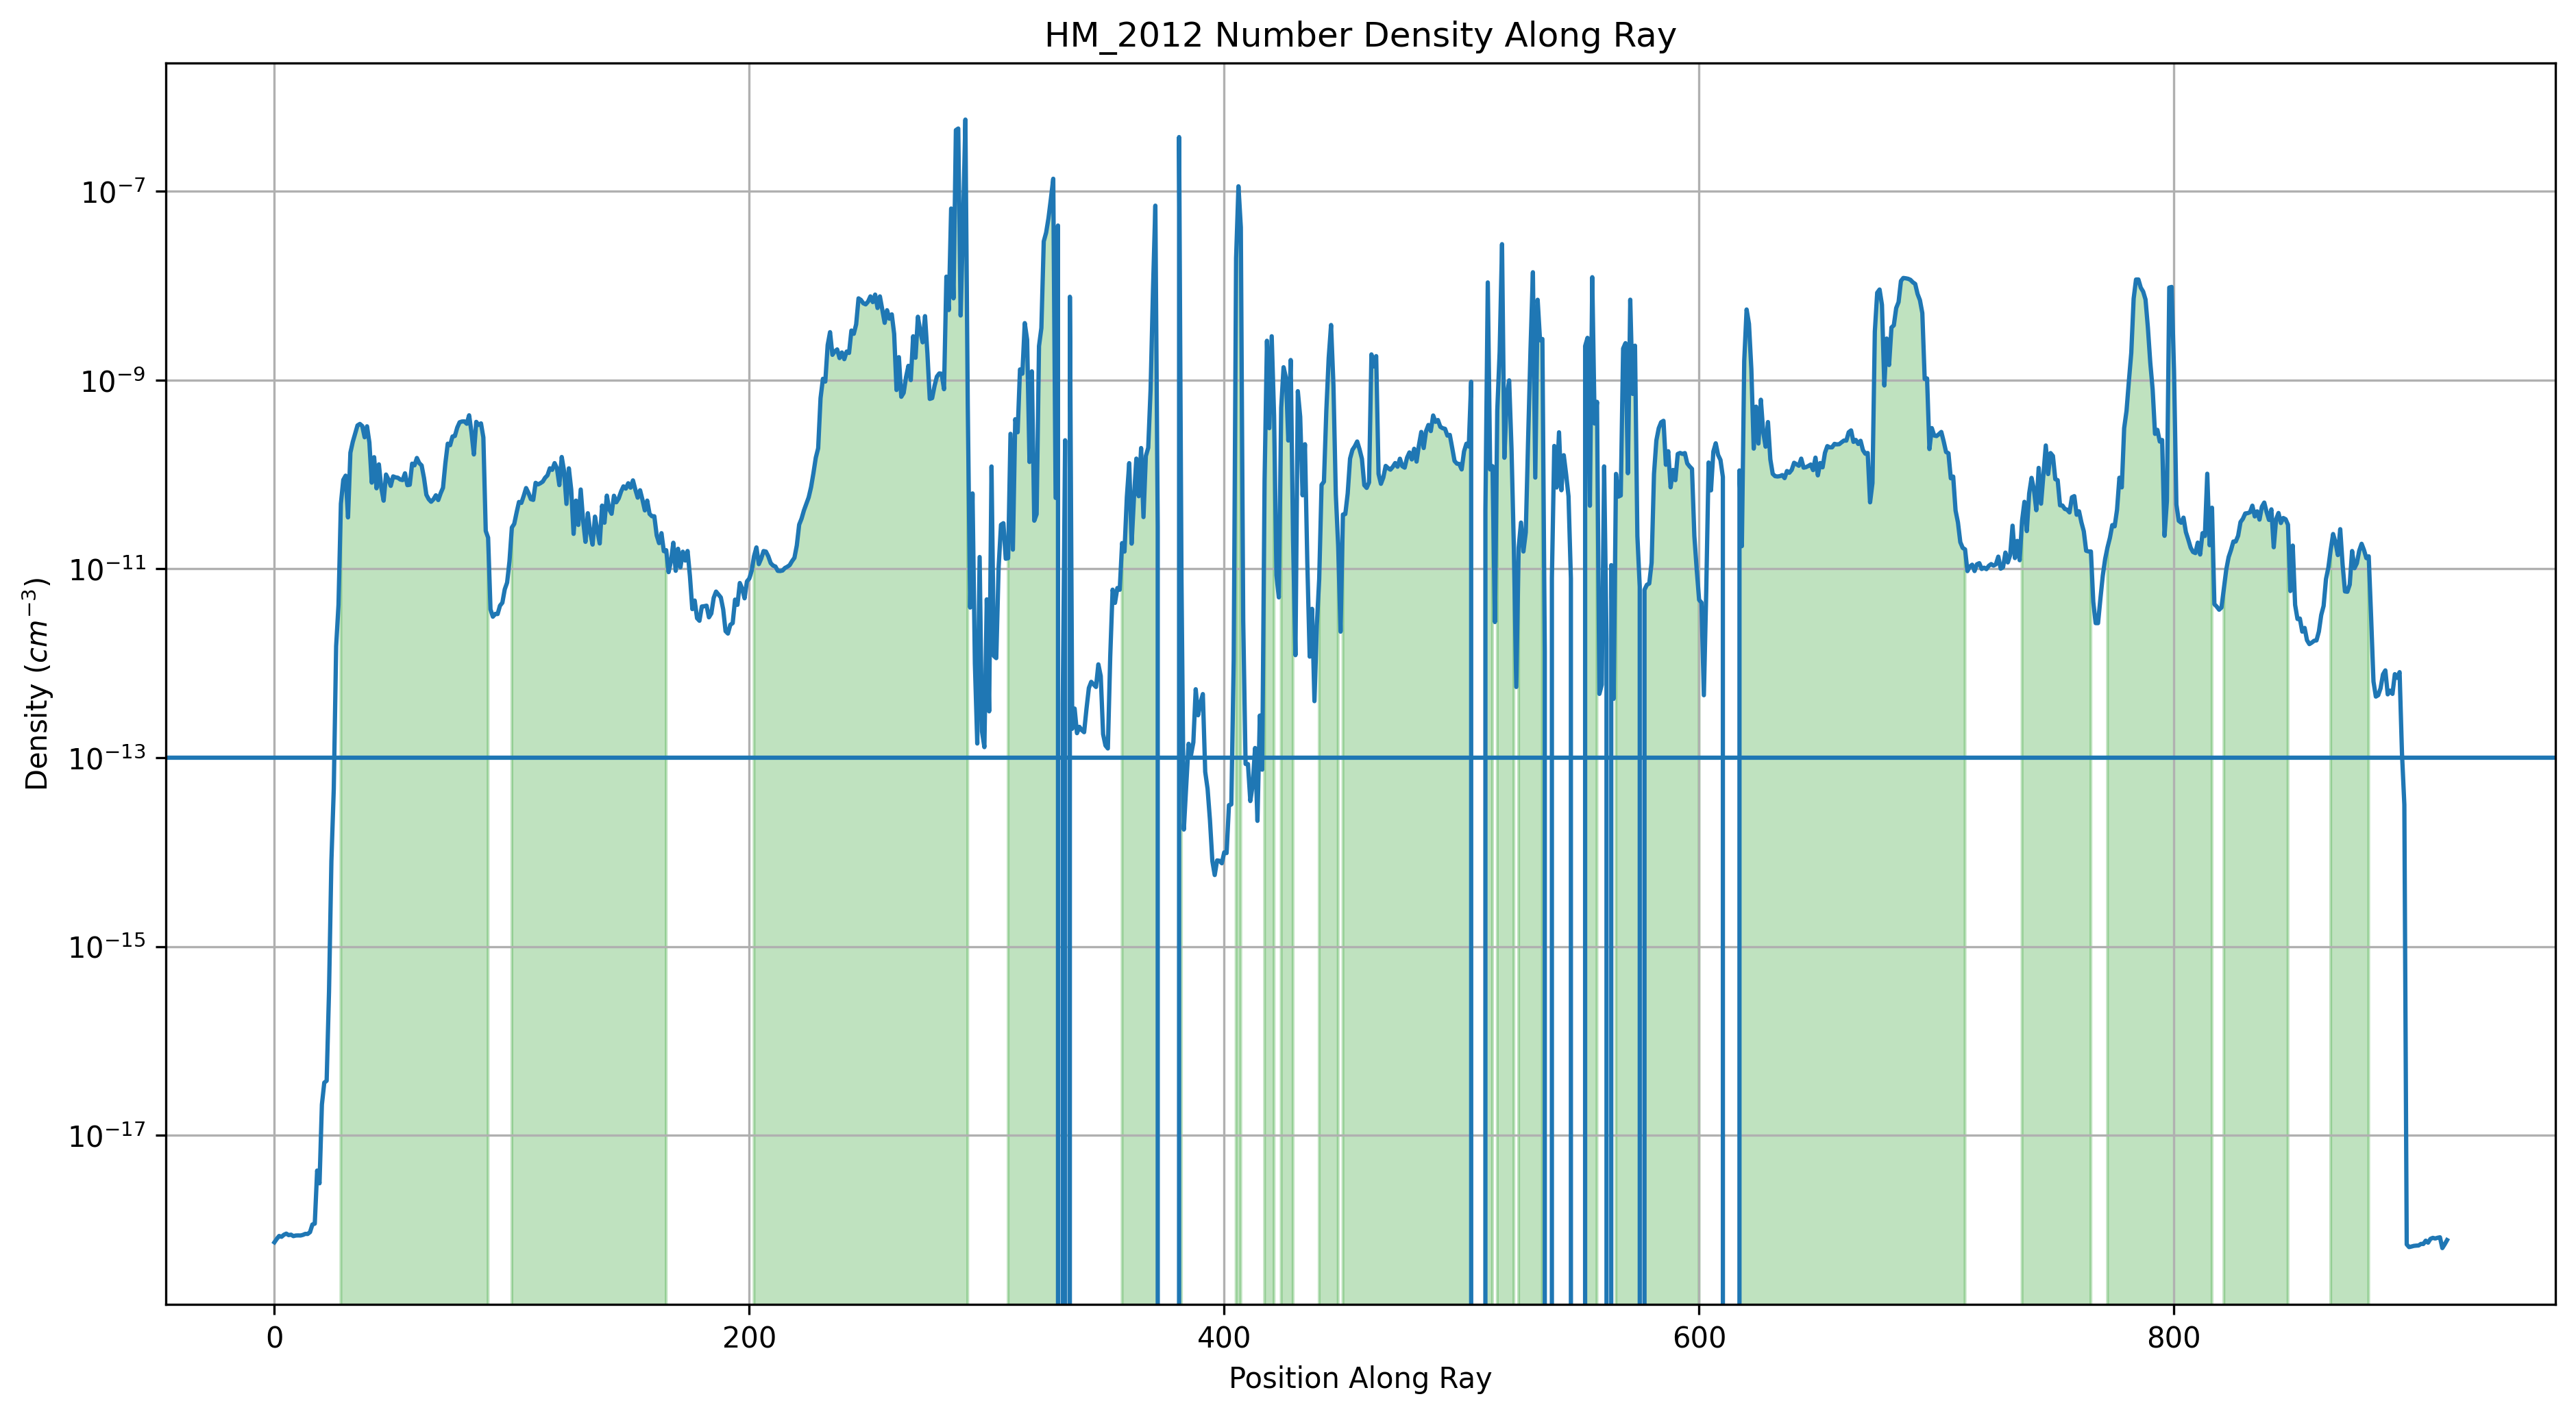

In [11]:
plt.figure(figsize = [15,8], dpi = 300)

plt.semilogy(dens,label = ion)
plt.axhline(1e-13)

uvb_dat = pcw_dat[ion][uvb_name][pcw_dat[ion][uvb_name]["lightray_index"] == str(ray)]


for i in range(len(uvb_dat["interval_start"])):
    
    lb = uvb_dat["interval_start"][i]
    hb = uvb_dat["interval_end"][i]
    
    rng = [lb,hb]
    
    yb = dens[slice(*rng)]
    xb = np.arange(*rng)
    
    plt.fill_between(xb,yb, color = "C2", alpha = 0.3)

plt.grid()
plt.xlabel("Position Along Ray")
plt.ylabel(r"Density ($cm^{-3}$)")
plt.title(f"{uvb_name} Number Density Along Ray")
plt.savefig(f"{uvb_name}_{ion}_clump_data.pdf")

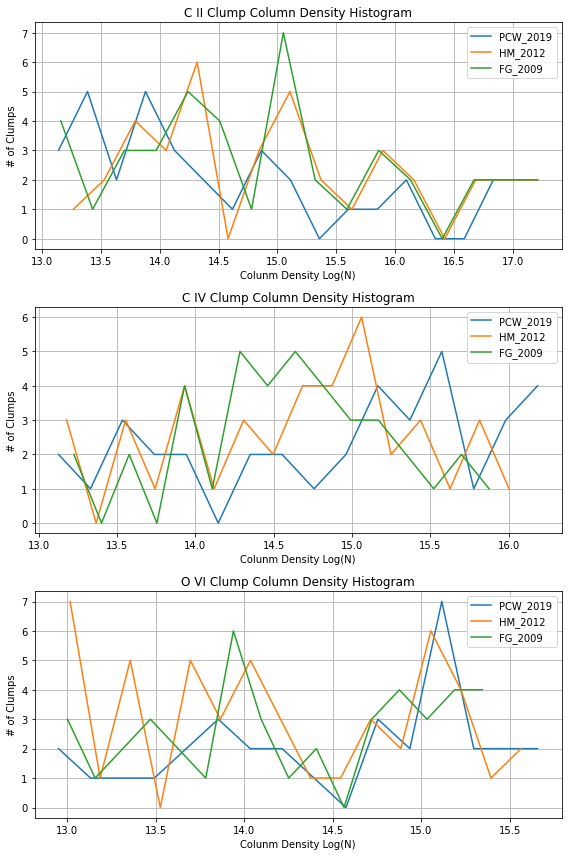

In [12]:
# generating histogram plots
fig, ax = plt.subplots(3,1, figsize = [8,12])

ray = 0

uvb_names = ["PCW_2019","HM_2012","FG_2009"]
uvb_list = [pcw_dat, hm_dat, fg_dat]

for i, ion in enumerate(ion_list):
    
    for j, name in enumerate(uvb_names):
        
        col_dens = uvb_list[j][ion][name]["col_dens"]
        
        num_dens, bin_edge = np.histogram(col_dens, bins = 16)

        bin_center = 0.5 * (bin_edge[1:] + bin_edge[:-1])

        ax[i].plot(bin_center, num_dens, label = name)
        
    ax[i].set_xlabel("Colunm Density Log(N)")
    ax[i].set_ylabel("# of Clumps")
    ax[i].set_title(f"{ion} Clump Column Density Histogram")
    ax[i].legend()
    ax[i].grid()
    

plt.tight_layout()

###### 